# Importe de librerías y carga de dataframe ya limpio y procesado

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [6]:
df = pd.read_csv('Bologna_Italia_Correcto.csv')
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  4668 non-null   object 
 1   source                                        4668 non-null   object 
 2   host_since                                    4668 non-null   object 
 3   host_response_time                            4668 non-null   object 
 4   host_response_rate                            4668 non-null   float64
 5   host_acceptance_rate                          4668 non-null   float64
 6   host_is_superhost                             4668 non-null   object 
 7   host_has_profile_pic                          4668 non-null   object 
 8   host_identity_verified                        4668 non-null   object 
 9   neighbourhood_cleansed                        4668 non-null   o

# Definición de funciones

In [29]:
def  func1 (x, a, b):
    x_corregida = np.clip(x, 1e-10, None)  # Evitar log(0) o negativos
    return a * np.log(x_corregida) + b #funcion logaritmica


def func2 (x, aa, bb, cc):
    return aa * np.exp(-bb * x) + cc #función exponencial

# Host response rate VS Number of reviews

In [34]:
Vars_Indep = df[['number_of_reviews']].values.flatten()
Var_Dep = df['host_response_rate'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [0.00389973 0.9535888 ]
Esto es "y" predecida del modelo 1:
 [0.96711639 0.96711639 0.96968349 ... 0.8637943  0.8637943  0.8637943 ]
Estos son los parámetros del modelo 2: 
 [-0.09808502  0.59451014  0.9697554 ]
Esto es "y" predecida del modelo 2: 
 [0.9697554  0.9697554  0.9697554  ... 0.87167038 0.87167038 0.87167038]


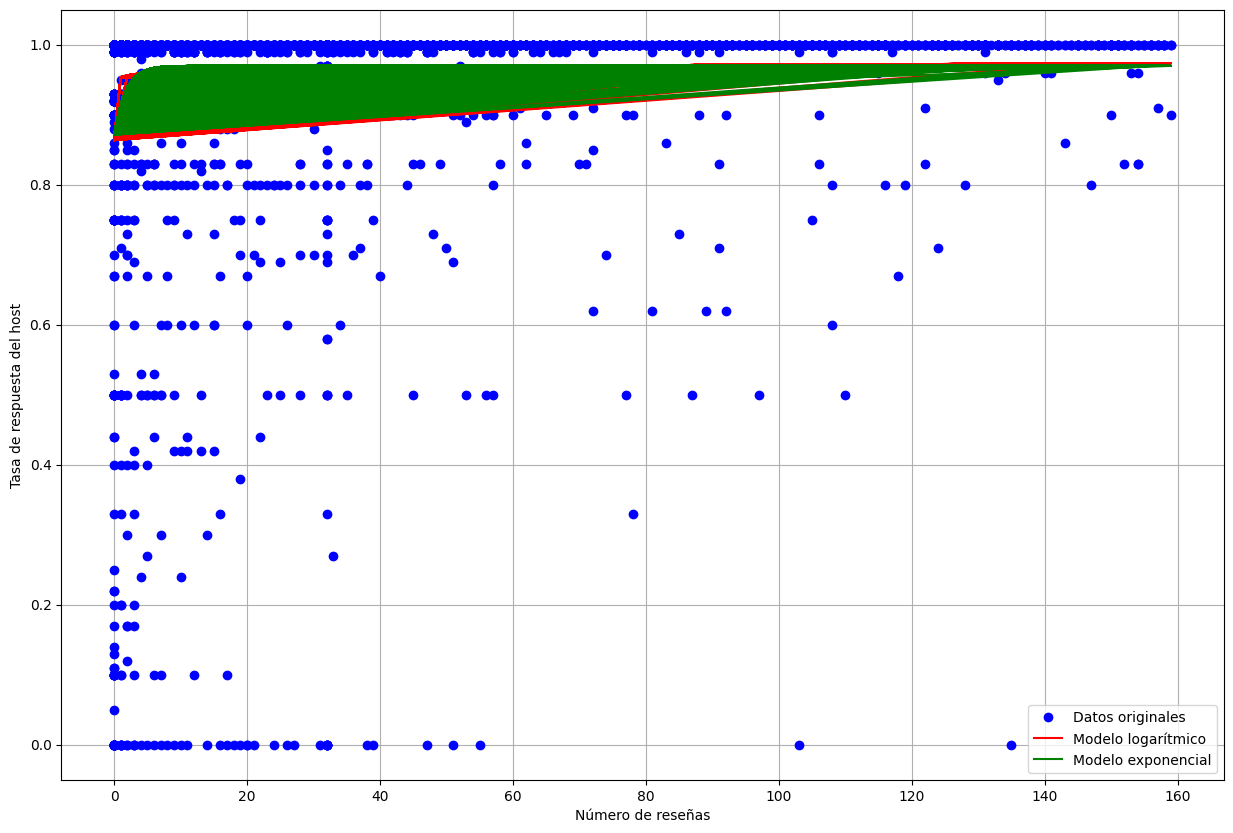

In [35]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('Número de reseñas')
plt.ylabel('Tasa de respuesta del host')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 0.035812914812706986
Esto es la correlación final del modelo 1 0.18924300465990013
Esto es la R cuadrada del modelo 2 0.03580078905012529
Esto es la correlación final del modelo 2 0.1892109644025031


# Host acceptance rate VS Number of reviews

In [48]:
Vars_Indep = df[['number_of_reviews']].values.flatten()
Var_Dep = df['host_acceptance_rate'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [0.00736895 0.88163282]
Esto es "y" predecida del modelo 1:
 [0.90719464 0.90719464 0.91204546 ... 0.71195646 0.71195646 0.71195646]
Estos son los parámetros del modelo 2: 
 [-0.17228473  0.1261552   0.93444365]
Esto es "y" predecida del modelo 2: 
 [0.93144079 0.93144079 0.93437457 ... 0.76215892 0.76215892 0.76215892]


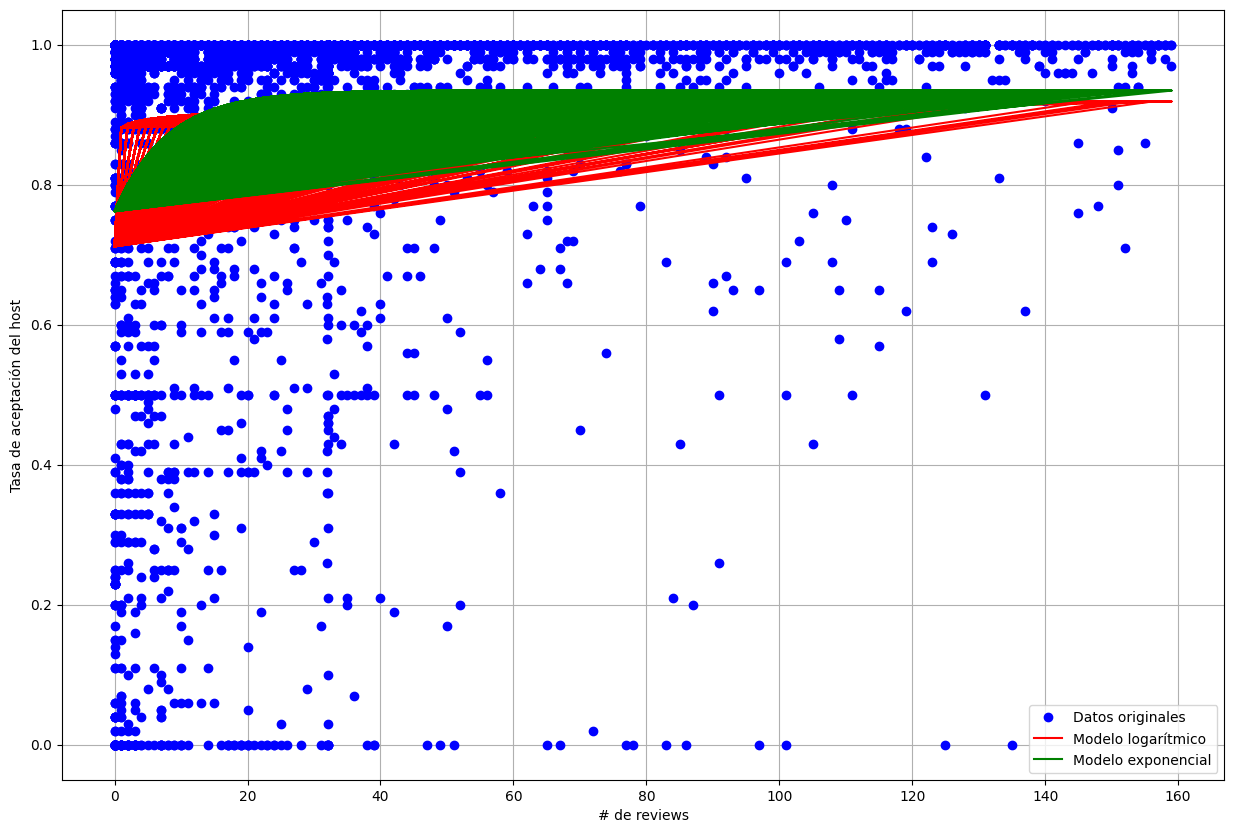

In [51]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('# de reviews')
plt.ylabel('Tasa de aceptación del host')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 0.05431812788474033
Esto es la correlación final del modelo 1 0.233062497808507
Esto es la R cuadrada del modelo 2 0.06297290541225375
Esto es la correlación final del modelo 2 0.2509440284450972


# Host total listings count VS Number of reviews

In [60]:
Vars_Indep = df[['number_of_reviews']].values.flatten()
Var_Dep = df['host_listings_count'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [-0.02208763  4.50435943]
Esto es "y" predecida del modelo 1:
 [4.42774063 4.42774063 4.41320083 ... 5.01294581 5.01294581 5.01294581]
Estos son los parámetros del modelo 2: 
 [1.62009543 0.03472714 3.65702811]
Esto es "y" predecida del modelo 2: 
 [4.18841962 4.18841962 3.84516268 ... 5.27712354 5.27712354 5.27712354]


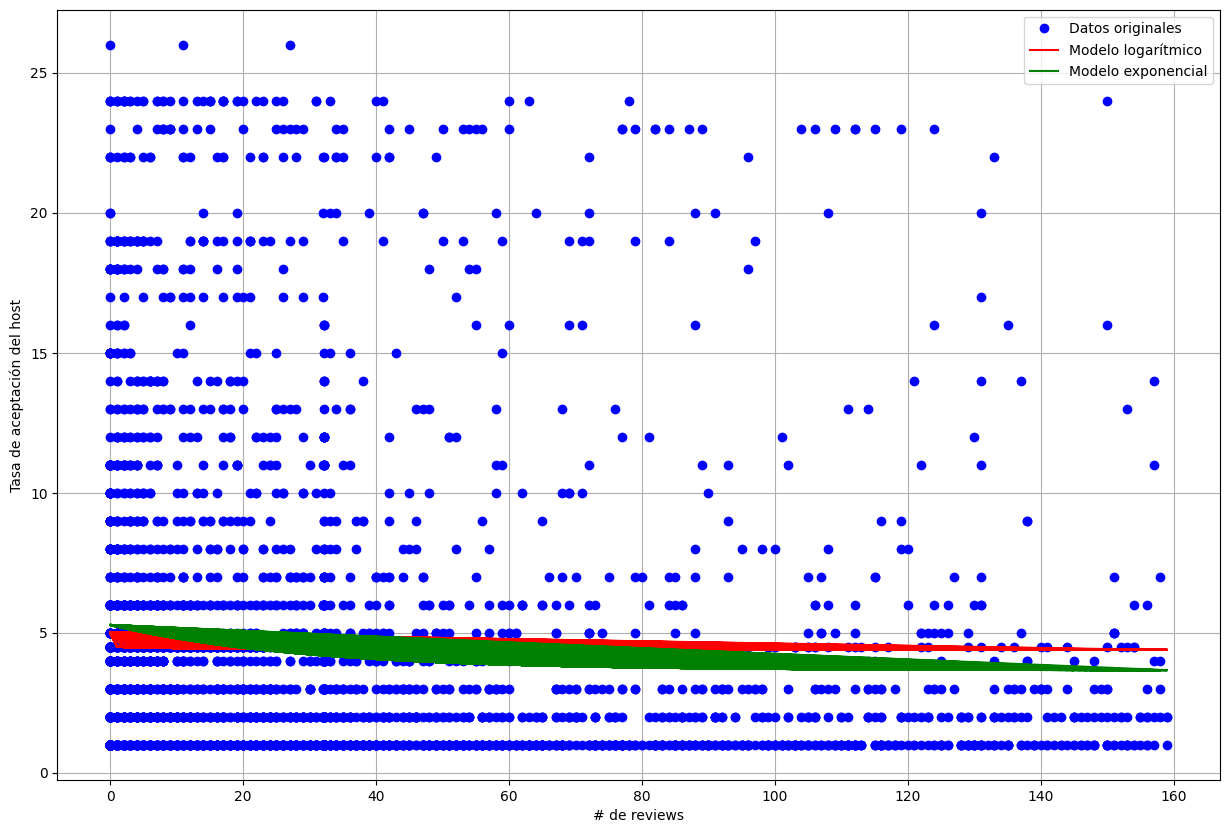

In [ ]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('# de reviews')
plt.ylabel('Total listings count')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 0.0012179326321728468
Esto es la correlación final del modelo 1 0.03489889156080529
Esto es la R cuadrada del modelo 2 0.012261324114017369
Esto es la correlación final del modelo 2 0.11073086342125835


# Accomodates VS Bedrooms

In [68]:
Vars_Indep = df[['bedrooms']].values.flatten()
Var_Dep = df['accommodates'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [0.03755403 3.35055972]
Esto es "y" predecida del modelo 1:
 [3.35055972 3.35055972 3.37659019 ... 3.35055972 3.37659019 3.35055972]
Estos son los parámetros del modelo 2: 
 [ 4.61298898 -0.20024111 -2.65908451]
Esto es "y" predecida del modelo 2: 
 [2.97659163 2.97659163 4.22600575 ... 2.97659163 4.22600575 2.97659163]


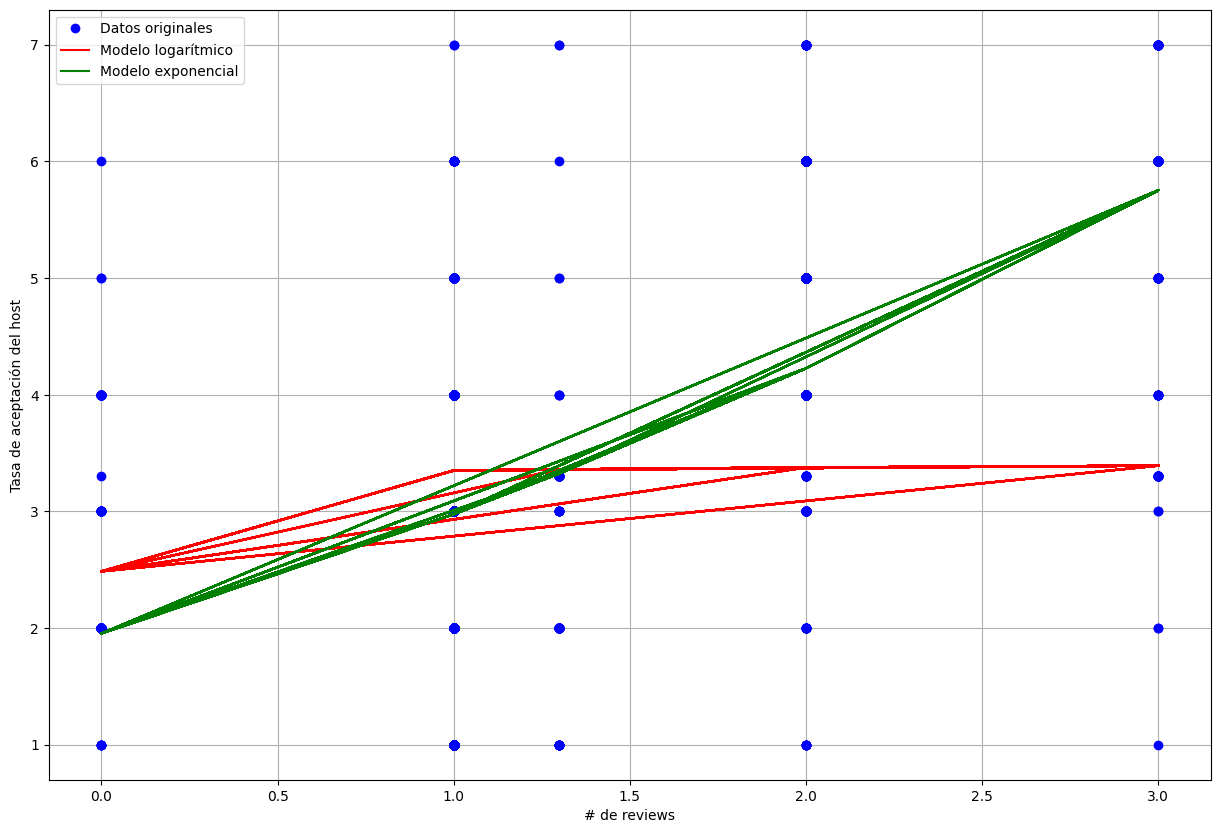

In [ ]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 0.01521332985528756
Esto es la correlación final del modelo 1 0.12334232791417374
Esto es la R cuadrada del modelo 2 0.32370077676756315
Esto es la correlación final del modelo 2 0.5689470772994296


# Reviews per month VS Review scores rating

In [71]:
Vars_Indep = df[['review_scores_rating']].values.flatten()
Var_Dep = df['reviews_per_month'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [0.72043695 0.19113651]
Esto es "y" predecida del modelo 1:
 [1.31064164 1.29212832 1.33754905 ... 1.30605772 1.30605772 1.30605772]
Estos son los parámetros del modelo 2: 
 [-3.92483367e+15  8.44844116e+00  1.35353863e+00]
Esto es "y" predecida del modelo 2: 
 [1.33620361 1.30576175 1.34974998 ... 1.33120302 1.33120302 1.33120302]


/var/folders/3f/t697tbsd4pj71pr0q9ghy2zm0000gn/T/ipykernel_8660/2131775904.py:7: RuntimeWarning: overflow encountered in exp
  return aa * np.exp(-bb * x) + cc #función exponencial


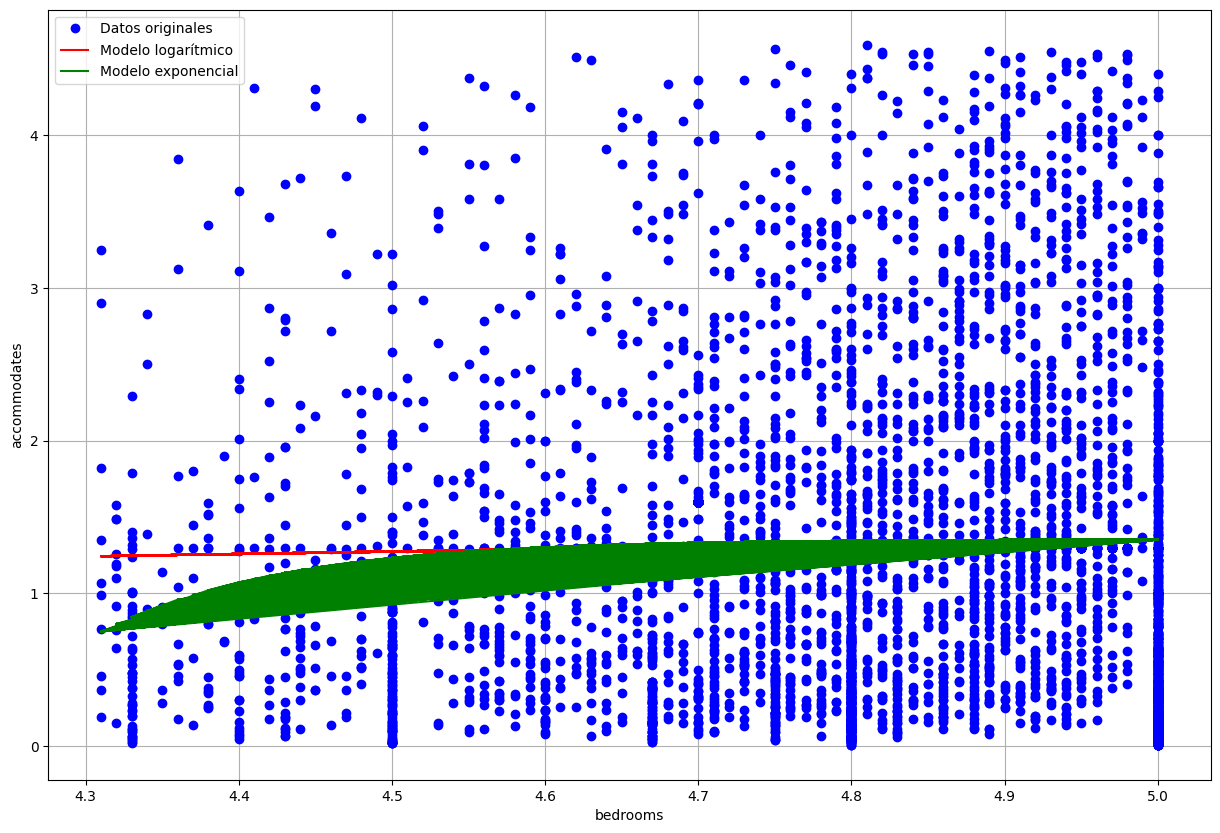

In [72]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 0.000574934715081965
Esto es la correlación final del modelo 1 0.023977796293278602
Esto es la R cuadrada del modelo 2 0.005979825903159819
Esto es la correlación final del modelo 2 0.07732933404058139


# Price vs Beds

In [74]:
Vars_Indep = df[['beds']].values.flatten()
Var_Dep = df['price'].values
x = Vars_Indep
y = Var_Dep

Estos son los parámetros del modelo 1: 
 [  0.75975695 141.36259207]
Esto es "y" predecida del modelo 1:
 [141.36259207 141.88921546 141.80916708 ... 141.88921546 141.80916708
 141.36259207]
Estos son los parámetros del modelo 2: 
 [ 1.19500653e+04 -1.59893073e-03 -1.18426450e+04]
Esto es "y" predecida del modelo 2: 
 [126.54294351 145.69615413 141.86306164 ... 145.69615413 141.86306164
 126.54294351]


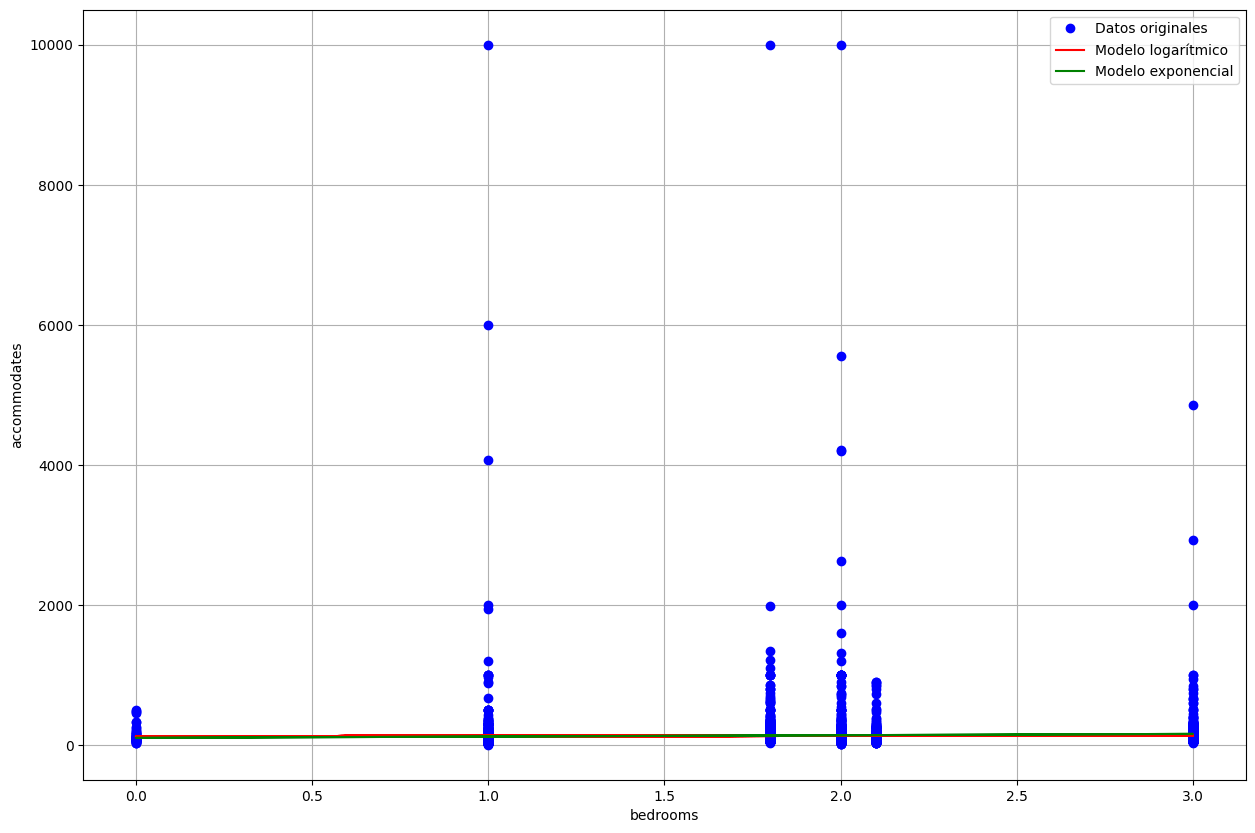

In [75]:
parametros1, covs1 = curve_fit(func1, x, y)
a,b = parametros1
print('Estos son los parámetros del modelo 1: \n',parametros1)
y_pred1 = func1(x, *parametros1)
print('Esto es "y" predecida del modelo 1:\n',y_pred1)

parametros2, covs2 = curve_fit(func2, x, y)
aa,bb,cc = parametros2
print('Estos son los parámetros del modelo 2: \n',parametros2)
y_pred2 = func2(x, *parametros2)
print('Esto es "y" predecida del modelo 2: \n',y_pred2)

plt.figure(figsize=(15, 10))
plt.plot(x, y, 'bo', label="Datos originales")
plt.plot(x, y_pred1, 'r-', label="Modelo logarítmico")
plt.plot(x, y_pred2, 'g-', label="Modelo exponencial")
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
R2_Modelo1 = r2_score(y, y_pred1) 
print('Esto es la R cuadrada del modelo 1',R2_Modelo1)
R1 = np.sqrt(R2_Modelo1)
print('Esto es la correlación final del modelo 1',R1)

R2_Modelo2 = r2_score(y, y_pred2) 
print('Esto es la R cuadrada del modelo 2',R2_Modelo2)
R2 = np.sqrt(R2_Modelo2)
print('Esto es la correlación final del modelo 2',R2)

Esto es la R cuadrada del modelo 1 3.803253646361693e-05
Esto es la correlación final del modelo 1 0.00616705249398908
Esto es la R cuadrada del modelo 2 0.001555493653177864
Esto es la correlación final del modelo 2 0.03943974712365514


# Análisis final

| Análisis (y vs x)                          | Modelo        | R² (Coef. Determinación) | r (Correlación) |
|--------------------------------------------|---------------|--------------------------|-----------------|
| **1. host_response_rate vs number_of_reviews** | Logarítmico   | 0.0358                  | 0.1892          |
|                                             | Exponencial    | 0.0358                  | 0.1892          |
| **2. host_acceptance_rate vs number_of_reviews** | Logarítmico   | 0.0543                  | 0.2331          |
|                                             | Exponencial    | 0.0630                  | 0.2509          |
| **3. host_listings_count vs number_of_reviews** | Logarítmico   | 0.0012                  | 0.0349          |
|                                             | Exponencial    | 0.0123                  | 0.1107          |
| **4. accommodates vs bedrooms**             | Logarítmico   | 0.0152                  | 0.1233          |
|                                             | Exponencial    | **0.3237**              | **0.5689**      |
| **5. reviews_per_month vs review_scores_rating** | Logarítmico   | 0.0006                  | 0.0240          |
|                                             | Exponencial    | 0.0060                  | 0.0773          |
| **6. price vs beds**                        | Logarítmico   | 0.000038                | 0.0062          |
|                                             | Exponencial    | 0.0016                  | 0.0394          |